In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Suppress potential registration errors for CUDA
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2024-07-03 16:43:51.274564: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 16:43:51.274676: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 16:43:51.435683: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import io
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Suppress potential OpenCV and PIL warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL')

In [3]:
from collections import Counter

X_train = []
Y_train = []

image_size = 150

labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

# Dictionary to store counts of each label
label_counts = {label: 0 for label in labels}

# Process training images
for label in labels:
    folderPath = os.path.join('/kaggle/input/soil-types-dataset/Dataset/Train', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Process test images
for label in labels:
    folderPath = os.path.join('/kaggle/input/soil-types-dataset/Dataset/test', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)
        label_counts[label] += 1

# Print each label with its count
for label, count in label_counts.items():
    print(f"{label}: {count}")

X_train = np.array(X_train)
Y_train = np.array(Y_train)

Alluvial soil: 576
Black Soil: 344
Clay soil: 262
Red soil: 373


In [4]:
Y_train


# Encode labels as integers
#label_encoder = LabelEncoder()
#Y_train_encoded = label_encoder.fit_transform(Y_train)

# Split the dataset into training and validation sets
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train_encoded, test_size=0.2, random_state=42)

# Normalize pixel values
#X_train = X_train / 255.0
#X_val = X_val / 255.0

#print("Training set shape:", X_train.shape)
#print("Validation set shape:", X_val.shape)
#print("Training labels shape:", Y_train.shape)
#print("Validation labels shape:", Y_val.shape)

array(['Alluvial soil', 'Alluvial soil', 'Alluvial soil', ..., 'Red soil',
       'Red soil', 'Red soil'], dtype='<U13')

In [5]:
#X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
#X_train.shape


# Shuffle the training data and labels
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)

# Check the shape of the training data
print("Shuffled training data shape:", X_train.shape)

Shuffled training data shape: (1555, 150, 150, 3)


In [6]:
#Print the number of samples in the training data

print("Number of samples in the training data:", len(X_train))

Number of samples in the training data: 1555


In [7]:

# Split the data into training and test sets
#X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
#print("Training data shape:", X_train.shape)
#print("Test data shape:", X_test.shape)
#print("Training labels shape:", Y_train.shape)
#print("Test labels shape:", Y_test.shape)

In [8]:
#X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

# Display the shape of the train and test sets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (1399, 150, 150, 3)
Test data shape: (156, 150, 150, 3)
Training labels shape: (1399,)
Test labels shape: (156,)


In [9]:
print(y_train)

['Clay soil' 'Alluvial soil' 'Red soil' ... 'Alluvial soil' 'Black Soil'
 'Red soil']


Data Augumentation


In [10]:
# Encode y_train labels
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train,num_classes=4)

# Encode y_test labels
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
    print(y_test_new)
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test,num_classes=4)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 2]
[0, 1, 2, 2, 1]
[0, 1, 2, 2, 1, 2]
[0, 1, 2, 2, 1, 2, 2]
[0, 1, 2, 2, 1, 2, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1, 2]
[0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 3, 2, 2, 3, 2, 0, 3, 1, 0, 3, 1, 2, 0]


In [11]:
y_train

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [12]:
print(y_test)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0.

In [13]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# #Scaling 
# def process(image,label):
#     image = tensorflow.cast(image/255. ,tensorflow.float32)
#     return image,label

# train_ds = train_ds.map(process)
# validation_ds = validation_ds.map(process)


#Generators=Dividing the dataset into the smaller chucks for the models
train_ds= train_datagen.flow(
        X_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        X_test, y_test, batch_size=32,)

Convolutional Neural Network

In [14]:
# model = Sequential()
# model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Dropout(0.3))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(Conv2D(256,(3,3),activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(512,activation = 'relu'))
# model.add(Dense(512,activation = 'relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4,activation='softmax'))

In [15]:
# model.summary()

In [16]:
validation_ds

**Transfer Learning (Feature Extraction):**

In [17]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
conv_base.trainable = False

**Transfer Learning with fine tuning**

In [19]:
# from keras.applications.vgg16 import VGG16
# conv_base = VGG16(
#     weights='imagenet',
#     include_top = False,
#     input_shape=(150,150,3)
# )


In [20]:
# conv_base.trainable = True

# set_trainable = False

# for layer in conv_base.layers:
#   if layer.name == 'block5_conv1':
#     set_trainable = True
#   if set_trainable:
#     layer.trainable = True
#   else:
#     layer.trainable = False

# for layer in conv_base.layers:
#   print(layer.name,layer.trainable)

In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [22]:
# model = Sequential()

# model.add(conv_base)
# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(Dense(4,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 19041860 (72.64 MB)
Trainable params: 4327

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
# def process(image):
#     image = image.reshape(426600000,150,150,3)
#     return image

# X_train= process(X_train)


In [26]:
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = validation_ds,
    )

Epoch 1/10


I0000 00:00:1720025078.403485      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


44/44 [==============================] - 24s 337ms/step - loss: 1.2725 - accuracy: 0.5039 - val_loss: 0.7153 - val_accuracy: 0.7244
Epoch 2/10
44/44 [==============================] - 7s 160ms/step - loss: 0.6077 - accuracy: 0.7727 - val_loss: 0.4224 - val_accuracy: 0.8269
Epoch 3/10
44/44 [==============================] - 7s 159ms/step - loss: 0.5523 - accuracy: 0.7820 - val_loss: 0.4278 - val_accuracy: 0.8462
Epoch 4/10
44/44 [==============================] - 7s 160ms/step - loss: 0.4460 - accuracy: 0.8335 - val_loss: 0.3016 - val_accuracy: 0.9038
Epoch 5/10
44/44 [==============================] - 7s 158ms/step - loss: 0.3885 - accuracy: 0.8620 - val_loss: 0.3092 - val_accuracy: 0.8397
Epoch 6/10
44/44 [==============================] - 7s 158ms/step - loss: 0.3812 - accuracy: 0.8563 - val_loss: 0.2536 - val_accuracy: 0.8974
Epoch 7/10
44/44 [==============================] - 7s 161ms/step - loss: 0.3317 - accuracy: 0.8749 - val_loss: 0.1939 - val_accuracy: 0.9167
Epoch 8/10
44/44

In [27]:
# history = model.fit(X_train,Y_train,validation_data=(X_test,y_test),epochs=20)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

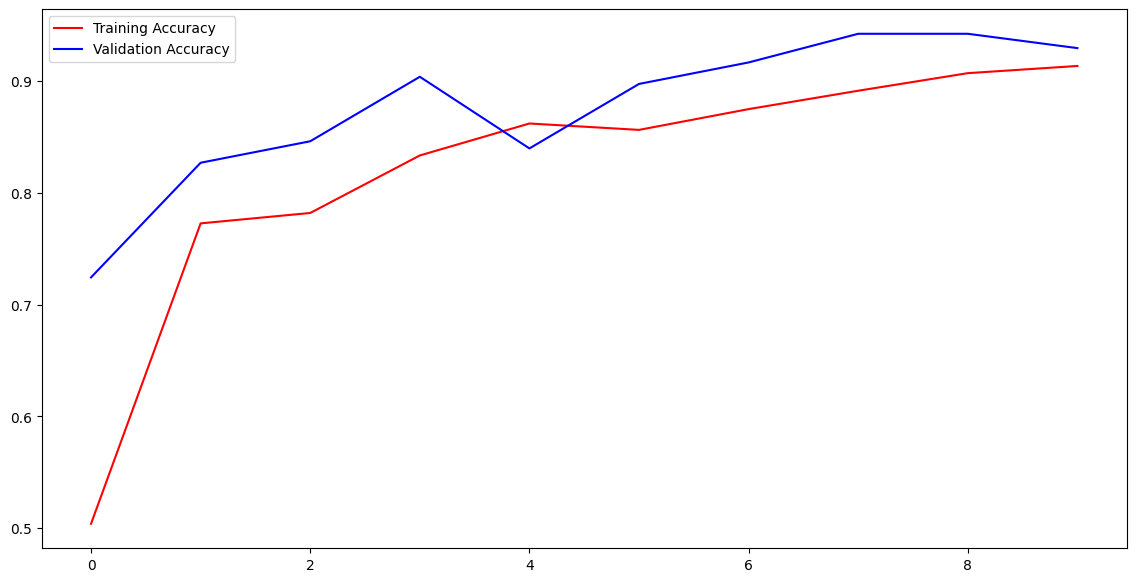

In [29]:
#model.save('soil_crop_recomendar.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

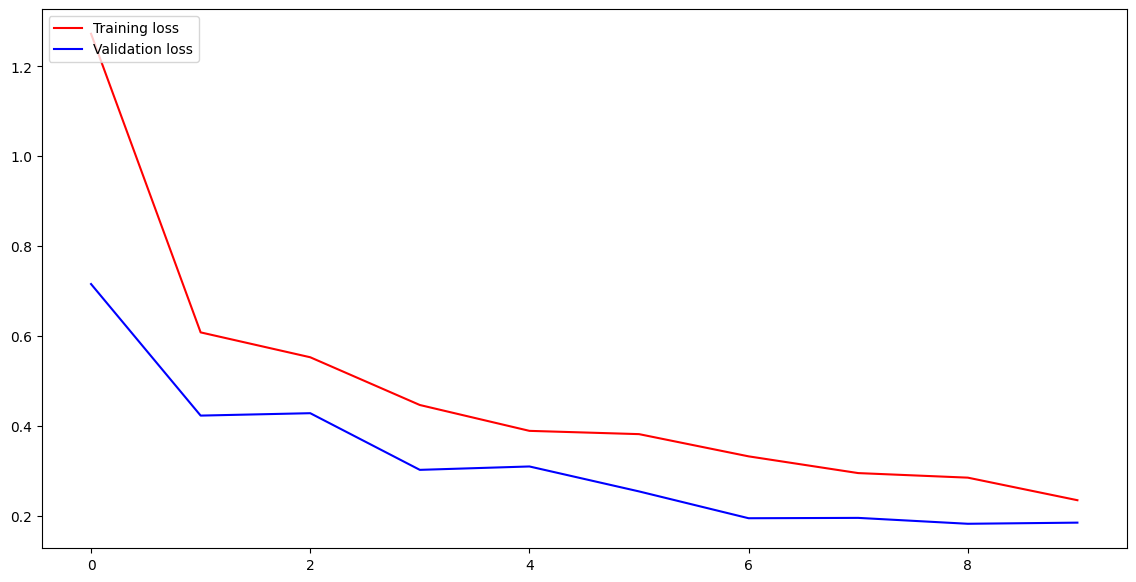

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

## Testing Part

In [31]:
image_path="/kaggle/input/soil-types-dataset/Dataset/test/Red soil/Copy of image-red-soil-texture-260nw-243951718.png"
img = cv2.imread(image_path)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [32]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

Selected image: /kaggle/input/soil-types-dataset/Dataset/Train/Clay soil/Clay_29.jpg


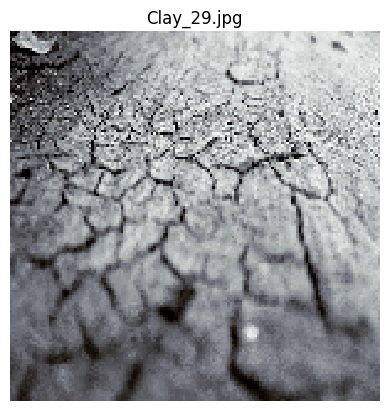

Original image shape: (150, 150, 3)
Expanded image shape: (1, 150, 150, 3)
Normalized image shape: (1, 150, 150, 3)
1/1 [==============================] - 1s 1s/step
Prediction array: [[8.2513662e-03 2.0529674e-02 9.7106892e-01 1.4999528e-04]]
Predicted class index: 2
Soil Type: Clay soil
{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}


In [33]:
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define your base image directory
base_directory = '/kaggle/input/soil-types-dataset/Dataset/Train'

# Define the subdirectories
subdirectories = ['Alluvial soil', 'Red soil', 'Black Soil', 'Clay soil']

# List all image files in all subdirectories
all_image_files = []
for subdir in subdirectories:
    directory = os.path.join(base_directory, subdir)
    files = os.listdir(directory)
    image_files = [os.path.join(directory, f) for f in files if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    all_image_files.extend(image_files)

# Select a random image file from the combined list
random_file = random.choice(all_image_files)
print(f"Selected image: {random_file}")  # Debug print to check the selected image path

# Load the randomly selected image using keras.preprocessing.image.load_img
img = image.load_img(random_file, target_size=(150, 150))  # Adjust target_size to (150, 150)

# Display the image using matplotlib
plt.imshow(img, interpolation='nearest')
plt.axis("off")  # Remove axis labels and ticks
plt.title(os.path.basename(random_file))  # Optional: Display filename as title
plt.show()

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
print(f"Original image shape: {img_array.shape}")  # Debug print to check the shape

img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
print(f"Expanded image shape: {img_array.shape}")  # Debug print to check the shape

img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
print(f"Normalized image shape: {img_array.shape}")  # Debug print to check the shape

# Predict the class of the image
a = model.predict(img_array)
print(f"Prediction array: {a}")  # Debug print to check the prediction output

indices = a.argmax()
print(f"Predicted class index: {indices}")  # Debug print to check the predicted index

labels = ["Alluvial soil", "Black Soil", "Clay soil", "Red soil"]  # Your label definitions

soil = {
    "Alluvial soil": "{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}",
    "Black Soil": "{This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower}",
    "Clay soil": "{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}",
    "Red soil": "{This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes}",
}

if labels[indices] in soil.keys():
    print("Soil Type:", labels[indices])
    print(soil[labels[indices]])


In [34]:
# Ensure labels are defined correctly and match the keys in the soil dictionary
labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

# Preprocess the image
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model's input shape
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Predict the class of the image
a = model.predict(img_array)

# Debugging print statements
print("Prediction array:", a)

indices = a.argmax()

# Debugging print statement
print("Predicted index:", indices)

soil = {
    "Alluvial soil": "{This soil is suitable for crops: Rice, SugarCane, Maize, Cotton, Soyabean, Jute}",
    "Black Soil": "{This soil is suitable for crops: Wheat, Virginia, Jowar, Millets, Linseed, Castor, Sunflower}",
    "Clay soil": "{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}",
    "Red soil": "{This soil is suitable for crops: Cotton, Pulses, Millets, OilSeeds, Potatoes}",
}

predicted_label = labels[indices]

# Debugging print statement
print("Predicted label:", predicted_label)

if predicted_label in soil.keys():
    print("Soil Type:", predicted_label)
    print(soil[predicted_label])
else:
    print("Predicted label not found in soil dictionary")



1/1 [==============================] - 0s 19ms/step
Prediction array: [[8.2513662e-03 2.0529674e-02 9.7106892e-01 1.4999528e-04]]
Predicted index: 2
Predicted label: Clay soil
Soil Type: Clay soil
{This soil is suitable for crops: Rice, Lettuce, Chard, Broccoli, Cabbage, Snap, Beans}


**Trying other Model**

In [35]:
!pip install torchsummary

In [36]:
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [37]:
data_dir = "../input/soil-types-dataset/Dataset"
Train_dir = data_dir + "/Train"
test_dir = data_dir + "/test"
Soiltypes = os.listdir(Train_dir)

# printing the soil types names
print(Soiltypes)

['Alluvial soil', 'Black Soil', 'Red soil', 'Clay soil']


In [38]:
print("Total soil types classes are: {}".format(len(Soiltypes)))

Total soil types classes are: 4


In [39]:
# datasets for validation and training
Train = ImageFolder(Train_dir, transform=transforms.ToTensor())
Test = ImageFolder(test_dir, transform=transforms.ToTensor()) 

In [40]:
# total number of classes in train set
len(Train.classes)

4

In [41]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + Train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Black Soil(1)


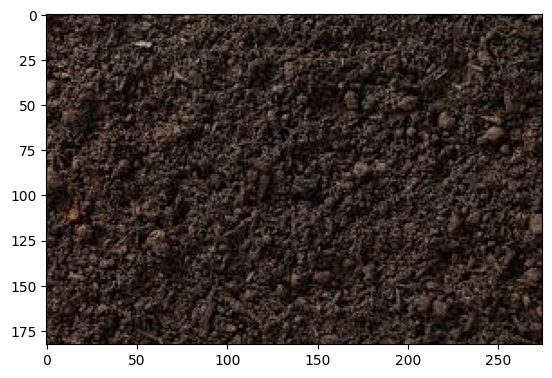

In [42]:
show_image(*Train[700])

In [43]:
a

array([[8.2513662e-03, 2.0529674e-02, 9.7106892e-01, 1.4999528e-04]],
      dtype=float32)

In [44]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]


In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import random
from sklearn.metrics import accuracy_score

# Define the directory containing the test images and a list of labels
test_directory = '/kaggle/input/soil-types-dataset/Dataset/test'
labels = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']  # Update this with your actual labels

# Load test images
test_images = []
test_labels = []

for label in labels:
    label_directory = os.path.join(test_directory, label)
    for img_name in os.listdir(label_directory):
        img_path = os.path.join(label_directory, img_name)
        img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input size
        img_array = image.img_to_array(img)
        test_images.append(img_array)
        test_labels.append(label)

# Convert lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Preprocess the images
test_images = test_images / 255.0  # Normalize pixel values to [0, 1]

# Function to predict the label of an image
def predict_image(img, model):
    img_array = np.expand_dims(img, axis=0)  # Expand dimensions to match the model's input shape
    prediction = model.predict(img_array)
    return labels[prediction.argmax()]  # Return the label with the highest probability

# Get a random sample of 32 indices
sample_indices = random.sample(range(len(test_images)), 32)

# Initialize lists to store actual and predicted labels for the sample
sample_actual_labels = []
sample_predicted_labels = []

# Getting predictions for the random sample (actual label vs predicted)
for i in sample_indices:
    img = test_images[i]
    actual_label = test_labels[i]
    predicted_label = predict_image(img, model)
    sample_actual_labels.append(actual_label)
    sample_predicted_labels.append(predicted_label)
    print('Label:', actual_label, ', Predicted:', predicted_label)

# Calculate accuracy for the random sample
accuracy = accuracy_score(sample_actual_labels, sample_predicted_labels)
print('Accuracy for the random sample:', accuracy)

1/1 [==============================] - 0s 60ms/step
Label: Black Soil , Predicted: Black Soil
1/1 [==============================] - 0s 18ms/step
Label: Black Soil , Predicted: Black Soil
1/1 [==============================] - 0s 18ms/step
Label: Clay soil , Predicted: Clay soil
1/1 [==============================] - 0s 19ms/step
Label: Clay soil , Predicted: Clay soil
1/1 [==============================] - 0s 18ms/step
Label: Black Soil , Predicted: Clay soil
1/1 [==============================] - 0s 18ms/step
Label: Alluvial soil , Predicted: Alluvial soil
1/1 [==============================] - 0s 18ms/step
Label: Red soil , Predicted: Red soil
1/1 [==============================] - 0s 19ms/step
Label: Alluvial soil , Predicted: Clay soil
1/1 [==============================] - 0s 18ms/step
Label: Black Soil , Predicted: Black Soil
1/1 [==============================] - 0s 18ms/step
Label: Black Soil , Predicted: Black Soil
1/1 [==============================] - 0s 18ms/step
Label: Al

 ## ****For Parameter which are in Numbers

In [46]:
import pandas as pd

In [47]:
#lets import the Dataset
df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

In [48]:
#overview of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [49]:
#checking for the NAN value in the data
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [50]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [51]:
#checking datatype
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [52]:
#uniques in label column
print(df.label.unique())
print("Total unique values in Label columns are: ",len(df.label.unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Total unique values in Label columns are:  22


In [53]:
df.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [54]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [55]:
X = df.drop(["label"], axis = 1)
y = pd.DataFrame(df.label)
print(X.shape)
print(y.shape)

(2200, 7)
(2200, 1)


In [56]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [57]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
2195,coffee
2196,coffee
2197,coffee
2198,coffee


In [58]:
from keras.utils import to_categorical


In [59]:
l_encode = LabelEncoder()
l_encode.fit(y)
y = l_encode.transform(y)
print(y)
y = to_categorical(y)
y

[20 20 20 ...  5  5  5]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
import numpy as np

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in X.columns:
            x = np.array(X[col]).reshape(-1,1)
            X[col]=scaler.fit_transform(x)

In [62]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [63]:
#Splitting training data and testing data using train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42, test_size=0.2)

In [64]:
type(y_train)

numpy.ndarray

In [65]:
a = tf.keras.utils.to_categorical(y_train, num_classes=22)

In [66]:
encoding=['rice' ,'maize', 'chickpea', 'kidneybeans', 'pigeonpeas' ,'mothbeans',
 'mungbean', 'blackgram','lentil' ,'pomegranate', 'banana' ,'mango', 'grapes',
 'watermelon', 'muskmelon', 'apple', 'orange' ,'papaya', 'coconut', 'cotton',
 'jute', 'coffee']


In [67]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
#y_train_new = []
 #for i in y_train:
        # y_train_new.append(encoding.index(i))
        # y_train=y_train_new
        # y_train = tf.keras.utils.to_categorical(y_train)

        # y_test_new = []
        # for i in y_test:
        #    y_test_new.append(encoding.index(i))
        # y_test=y_test_new
        # y_test = tf.keras.utils.to_categorical(y_test)


In [69]:
# y_train = y_train["label"].tolist()
# y_test = y_test["label"].tolist() 



In [70]:
# y_train_new = []
# for i in y_train:
#         y_train_new.append(encoding.index(i))
#         y_train=y_train_new
#         y_train = tf.keras.utils.to_categorical(y_train)

#         y_test_new = []
#         for i in y_test:
#             y_test_new.append(encoding.index(i))
#         y_test=y_test_new
#         y_test = tf.keras.utils.to_categorical(y_test)


In [71]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## ANN Model

In [72]:
## Part 2:
## Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout#regularization


In [73]:
##Lets initialize the ANN
classifier=Sequential()

In [74]:
## Adding the input layers
classifier.add(Dense(units=7))

In [75]:
## Adding the 1'st hidden layers
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dropout(0.2))

## Adding the 2'st hidden layers
classifier.add(Dense(units=28,activation='relu'))
classifier.add(Dropout(0.2))


## Adding the output layers
classifier.add(Dense(22,activation='softmax'))

In [76]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [77]:
classifier.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=9,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [79]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=15,callbacks=early_stopping)

Epoch 1/15
176/176 [==============================] - 3s 5ms/step - loss: 1.2842 - accuracy: 0.5517 - val_loss: 0.4618 - val_accuracy: 0.8295
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 0.5960 - accuracy: 0.7875 - val_loss: 0.3334 - val_accuracy: 0.8477
Epoch 3/15
176/176 [==============================] - 1s 3ms/step - loss: 0.4837 - accuracy: 0.8261 - val_loss: 0.1938 - val_accuracy: 0.9386
Epoch 4/15
176/176 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.8313 - val_loss: 0.2268 - val_accuracy: 0.9023
Epoch 5/15
176/176 [==============================] - 1s 3ms/step - loss: 0.4001 - accuracy: 0.8398 - val_loss: 0.2138 - val_accuracy: 0.9114
Epoch 6/15
176/176 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8841 - val_loss: 0.2146 - val_accuracy: 0.9273
Epoch 7/15
176/176 [==============================] - 1s 3ms/step - loss: 0.3045 - accuracy: 0.8807 - val_loss: 0.1492 - val_accuracy: 0.9455
Epoch 

In [80]:
newdata=classifier.predict([[90, 42, 43, 20.879744, 75, 5.5,220]])
print(newdata)
result=np.argmax(newdata)
print(encoding[result])

1/1 [==============================] - 0s 96ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
jute
